In [1656]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import scipy.stats as stats
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from kmodes.kmodes import KModes
from sklearn import feature_selection
from sklearn.cluster import AgglomerativeClustering
import matplotlib.colors as mcolors
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import dendrogram
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [1657]:
df_spotify_original = pd.read_csv('datasets/spotify-2023.csv', index_col=0, encoding='ISO-8859-1')

In [1658]:
df_spotify_original.head()

,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
track_name,,,,,,,,,,,,,,,,,,,,,
Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,...,125,B,Major,80,89,83,31,0,8,4
LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,...,92,C#,Major,71,61,74,7,0,10,4
vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,...,138,F,Major,51,32,53,17,0,31,6
Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,...,170,A,Major,55,58,72,11,0,11,15
WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,...,144,A,Minor,65,23,80,14,63,11,6


In [1659]:
df_spotify_original.info()

<class 'pandas.core.frame.DataFrame'>
Index: 953 entries, Seven (feat. Latto) (Explicit Ver.) to Alone
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   artist(s)_name        953 non-null    object
 1   artist_count          953 non-null    int64 
 2   released_year         953 non-null    int64 
 3   released_month        953 non-null    int64 
 4   released_day          953 non-null    int64 
 5   in_spotify_playlists  953 non-null    int64 
 6   in_spotify_charts     953 non-null    int64 
 7   streams               953 non-null    object
 8   in_apple_playlists    953 non-null    int64 
 9   in_apple_charts       953 non-null    int64 
 10  in_deezer_playlists   953 non-null    object
 11  in_deezer_charts      953 non-null    int64 
 12  in_shazam_charts      903 non-null    object
 13  bpm                   953 non-null    int64 
 14  key                   858 non-null    object
 15  mode     

In [1660]:
df_spotify_original.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [1661]:
df_spotify_original.describe(include=['object'])

,artist(s)_name,streams,in_deezer_playlists,in_shazam_charts,key,mode
count,953,953,953,903,858,953
unique,645,949,348,198,11,2
top,Taylor Swift,723894473,0,0,C#,Major
freq,34,2,24,344,120,550


In [1662]:
df_spotify_original.isnull().mean() * 100

artist(s)_name          0.00000
artist_count            0.00000
released_year           0.00000
released_month          0.00000
released_day            0.00000
in_spotify_playlists    0.00000
in_spotify_charts       0.00000
streams                 0.00000
in_apple_playlists      0.00000
in_apple_charts         0.00000
in_deezer_playlists     0.00000
in_deezer_charts        0.00000
in_shazam_charts        5.24659
bpm                     0.00000
key                     9.96852
mode                    0.00000
danceability_%          0.00000
valence_%               0.00000
energy_%                0.00000
acousticness_%          0.00000
instrumentalness_%      0.00000
liveness_%              0.00000
speechiness_%           0.00000
dtype: float64

In [1663]:
df_spotify = df_spotify_original.copy()

In [1664]:
df_spotify.info()

<class 'pandas.core.frame.DataFrame'>
Index: 953 entries, Seven (feat. Latto) (Explicit Ver.) to Alone
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   artist(s)_name        953 non-null    object
 1   artist_count          953 non-null    int64 
 2   released_year         953 non-null    int64 
 3   released_month        953 non-null    int64 
 4   released_day          953 non-null    int64 
 5   in_spotify_playlists  953 non-null    int64 
 6   in_spotify_charts     953 non-null    int64 
 7   streams               953 non-null    object
 8   in_apple_playlists    953 non-null    int64 
 9   in_apple_charts       953 non-null    int64 
 10  in_deezer_playlists   953 non-null    object
 11  in_deezer_charts      953 non-null    int64 
 12  in_shazam_charts      903 non-null    object
 13  bpm                   953 non-null    int64 
 14  key                   858 non-null    object
 15  mode     

In [1665]:
def impute_keys_with_null_values(df):
    mode = df['key'].mode()[0]
    df['key'].fillna(mode, inplace=True)
    return df
impute_keys_with_null_values(df_spotify)

,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
track_name,,,,,,,,,,,,,,,,,,,,,
Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,...,125,B,Major,80,89,83,31,0,8,4
LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,...,92,C#,Major,71,61,74,7,0,10,4
vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,...,138,F,Major,51,32,53,17,0,31,6
Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,...,170,A,Major,55,58,72,11,0,11,15
WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,13,...,144,A,Major,60,24,39,57,0,8,3
Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,0,...,166,F#,Major,42,7,24,83,1,12,6
A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,0,...,92,C#,Major,80,81,67,4,0,8,6


In [1666]:
def remove_commas(df, column_name):
    df[column_name] = df[column_name].str.replace(',', '')
    return df
df_spotify = remove_commas(df_spotify, 'in_deezer_playlists')

In [1667]:
def convert_int64_to_float64(df):
    df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'], errors='coerce')
    df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce')
    df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
    for col in df.columns:
        if df[col].dtype == 'int64' and col != 'released_year' and col != 'released_month' and col != 'released_day':
            df[col] = df[col].astype('float64')
    return df
convert_int64_to_float64(df_spotify)


,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
track_name,,,,,,,,,,,,,,,,,,,,,
Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2.0,2023,7,14,553.0,147.0,141381703.0,43.0,263.0,...,125.0,B,Major,80.0,89.0,83.0,31.0,0.0,8.0,4.0
LALA,Myke Towers,1.0,2023,3,23,1474.0,48.0,133716286.0,48.0,126.0,...,92.0,C#,Major,71.0,61.0,74.0,7.0,0.0,10.0,4.0
vampire,Olivia Rodrigo,1.0,2023,6,30,1397.0,113.0,140003974.0,94.0,207.0,...,138.0,F,Major,51.0,32.0,53.0,17.0,0.0,31.0,6.0
Cruel Summer,Taylor Swift,1.0,2019,8,23,7858.0,100.0,800840817.0,116.0,207.0,...,170.0,A,Major,55.0,58.0,72.0,11.0,0.0,11.0,15.0
WHERE SHE GOES,Bad Bunny,1.0,2023,5,18,3133.0,50.0,303236322.0,84.0,133.0,...,144.0,A,Minor,65.0,23.0,80.0,14.0,63.0,11.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
My Mind & Me,Selena Gomez,1.0,2022,11,3,953.0,0.0,91473363.0,61.0,13.0,...,144.0,A,Major,60.0,24.0,39.0,57.0,0.0,8.0,3.0
Bigger Than The Whole Sky,Taylor Swift,1.0,2022,10,21,1180.0,0.0,121871870.0,4.0,0.0,...,166.0,F#,Major,42.0,7.0,24.0,83.0,1.0,12.0,6.0
A Veces (feat. Feid),"Feid, Paulo Londra",2.0,2022,11,3,573.0,0.0,73513683.0,2.0,0.0,...,92.0,C#,Major,80.0,81.0,67.0,4.0,0.0,8.0,6.0


In [1668]:
def impute_missing_values(df):
    mean = df['in_shazam_charts'].mean().round()
    df['in_shazam_charts'] = df['in_shazam_charts'].fillna(mean)
    return df
df_spotify = impute_missing_values(df_spotify)


In [1669]:
def remove_stream_with_null_values(df):
    df.dropna(subset=['streams'], inplace=True)
    return df
remove_stream_with_null_values(df_spotify)

,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
track_name,,,,,,,,,,,,,,,,,,,,,
Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2.0,2023,7,14,553.0,147.0,141381703.0,43.0,263.0,...,125.0,B,Major,80.0,89.0,83.0,31.0,0.0,8.0,4.0
LALA,Myke Towers,1.0,2023,3,23,1474.0,48.0,133716286.0,48.0,126.0,...,92.0,C#,Major,71.0,61.0,74.0,7.0,0.0,10.0,4.0
vampire,Olivia Rodrigo,1.0,2023,6,30,1397.0,113.0,140003974.0,94.0,207.0,...,138.0,F,Major,51.0,32.0,53.0,17.0,0.0,31.0,6.0
Cruel Summer,Taylor Swift,1.0,2019,8,23,7858.0,100.0,800840817.0,116.0,207.0,...,170.0,A,Major,55.0,58.0,72.0,11.0,0.0,11.0,15.0
WHERE SHE GOES,Bad Bunny,1.0,2023,5,18,3133.0,50.0,303236322.0,84.0,133.0,...,144.0,A,Minor,65.0,23.0,80.0,14.0,63.0,11.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
My Mind & Me,Selena Gomez,1.0,2022,11,3,953.0,0.0,91473363.0,61.0,13.0,...,144.0,A,Major,60.0,24.0,39.0,57.0,0.0,8.0,3.0
Bigger Than The Whole Sky,Taylor Swift,1.0,2022,10,21,1180.0,0.0,121871870.0,4.0,0.0,...,166.0,F#,Major,42.0,7.0,24.0,83.0,1.0,12.0,6.0
A Veces (feat. Feid),"Feid, Paulo Londra",2.0,2022,11,3,573.0,0.0,73513683.0,2.0,0.0,...,92.0,C#,Major,80.0,81.0,67.0,4.0,0.0,8.0,6.0


In [1670]:
df_spotify.isnull().mean() * 100

artist(s)_name          0.0
artist_count            0.0
released_year           0.0
released_month          0.0
released_day            0.0
in_spotify_playlists    0.0
in_spotify_charts       0.0
streams                 0.0
in_apple_playlists      0.0
in_apple_charts         0.0
in_deezer_playlists     0.0
in_deezer_charts        0.0
in_shazam_charts        0.0
bpm                     0.0
key                     0.0
mode                    0.0
danceability_%          0.0
valence_%               0.0
energy_%                0.0
acousticness_%          0.0
instrumentalness_%      0.0
liveness_%              0.0
speechiness_%           0.0
dtype: float64

In [1671]:
df_spotify.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, Seven (feat. Latto) (Explicit Ver.) to Alone
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   artist(s)_name        952 non-null    object 
 1   artist_count          952 non-null    float64
 2   released_year         952 non-null    int64  
 3   released_month        952 non-null    int64  
 4   released_day          952 non-null    int64  
 5   in_spotify_playlists  952 non-null    float64
 6   in_spotify_charts     952 non-null    float64
 7   streams               952 non-null    float64
 8   in_apple_playlists    952 non-null    float64
 9   in_apple_charts       952 non-null    float64
 10  in_deezer_playlists   952 non-null    float64
 11  in_deezer_charts      952 non-null    float64
 12  in_shazam_charts      952 non-null    float64
 13  bpm                   952 non-null    float64
 14  key                   952 non-null    objec

In [1672]:
x = df_spotify.copy()

In [1673]:
percentage_features = ['danceability_%', 'energy_%', 'speechiness_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'valence_%']
date_features = ['released_year', 'released_month', 'released_day']
def scale_features(df, percentage_features):
    for col in percentage_features:
        df[col] = df[col] / 100.0
    return df
scale_features(df_spotify, percentage_features)

,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
track_name,,,,,,,,,,,,,,,,,,,,,
Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2.0,2023,7,14,553.0,147.0,141381703.0,43.0,263.0,...,125.0,B,Major,0.80,0.89,0.83,0.31,0.00,0.08,0.04
LALA,Myke Towers,1.0,2023,3,23,1474.0,48.0,133716286.0,48.0,126.0,...,92.0,C#,Major,0.71,0.61,0.74,0.07,0.00,0.10,0.04
vampire,Olivia Rodrigo,1.0,2023,6,30,1397.0,113.0,140003974.0,94.0,207.0,...,138.0,F,Major,0.51,0.32,0.53,0.17,0.00,0.31,0.06
Cruel Summer,Taylor Swift,1.0,2019,8,23,7858.0,100.0,800840817.0,116.0,207.0,...,170.0,A,Major,0.55,0.58,0.72,0.11,0.00,0.11,0.15
WHERE SHE GOES,Bad Bunny,1.0,2023,5,18,3133.0,50.0,303236322.0,84.0,133.0,...,144.0,A,Minor,0.65,0.23,0.80,0.14,0.63,0.11,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
My Mind & Me,Selena Gomez,1.0,2022,11,3,953.0,0.0,91473363.0,61.0,13.0,...,144.0,A,Major,0.60,0.24,0.39,0.57,0.00,0.08,0.03
Bigger Than The Whole Sky,Taylor Swift,1.0,2022,10,21,1180.0,0.0,121871870.0,4.0,0.0,...,166.0,F#,Major,0.42,0.07,0.24,0.83,0.01,0.12,0.06
A Veces (feat. Feid),"Feid, Paulo Londra",2.0,2022,11,3,573.0,0.0,73513683.0,2.0,0.0,...,92.0,C#,Major,0.80,0.81,0.67,0.04,0.00,0.08,0.06


In [1674]:
def standardize(data: pd.Series) -> pd.Series:
    return (data - np.mean(data)) / np.std(data)

In [1675]:
def normalize(data: pd.Series) -> pd.Series:
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [1676]:
def standardize_columns(df: pd.DataFrame) -> pd.DataFrame:
    for col in df.columns:
        if df[col].dtype == 'float64' and col != 'artist_count' and col not in percentage_features and col not in date_features:
            df[col + ' Z'] = standardize(df[col])
    return df
standardize_columns(df_spotify)

,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,speechiness_%,in_spotify_playlists Z,in_spotify_charts Z,streams Z,in_apple_playlists Z,in_apple_charts Z,in_deezer_playlists Z,in_deezer_charts Z,in_shazam_charts Z,bpm Z
track_name,,,,,,,,,,,,,,,,,,,,,
Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2.0,2023,7,14,553.0,147.0,141381703.0,43.0,263.0,...,0.04,-0.588758,6.896440,-0.657929,-0.287724,4.170501,-0.301230,1.214732,6.317955,0.087202
LALA,Myke Towers,1.0,2023,3,23,1474.0,48.0,133716286.0,48.0,126.0,...,0.04,-0.472135,1.838224,-0.671459,-0.229871,1.463112,-0.289730,1.877534,2.697352,-1.089065
vampire,Olivia Rodrigo,1.0,2023,6,30,1397.0,113.0,140003974.0,94.0,207.0,...,0.06,-0.481885,5.159275,-0.660361,0.302382,3.063831,-0.260539,1.877534,7.320959,0.550580
Cruel Summer,Taylor Swift,1.0,2019,8,23,7858.0,100.0,800840817.0,116.0,207.0,...,0.15,0.336248,4.495065,0.506043,0.556937,3.063831,-0.230464,1.546133,4.051001,1.691202
WHERE SHE GOES,Bad Bunny,1.0,2023,5,18,3133.0,50.0,303236322.0,84.0,133.0,...,0.06,-0.262062,1.940410,-0.372249,0.186675,1.601446,-0.264078,2.043235,3.047996,0.764446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
My Mind & Me,Selena Gomez,1.0,2022,11,3,953.0,0.0,91473363.0,61.0,13.0,...,0.03,-0.538107,-0.614244,-0.746019,-0.079451,-0.769990,-0.308306,-0.276574,-0.417670,0.764446
Bigger Than The Whole Sky,Taylor Swift,1.0,2022,10,21,1180.0,0.0,121871870.0,4.0,0.0,...,0.06,-0.509363,-0.614244,-0.692365,-0.738981,-1.026896,-0.333959,-0.442275,-0.417670,1.548624
A Veces (feat. Feid),"Feid, Paulo Londra",2.0,2022,11,3,573.0,0.0,73513683.0,2.0,0.0,...,0.06,-0.586225,-0.614244,-0.777719,-0.762123,-1.026896,-0.334844,-0.442275,-0.417670,-1.089065


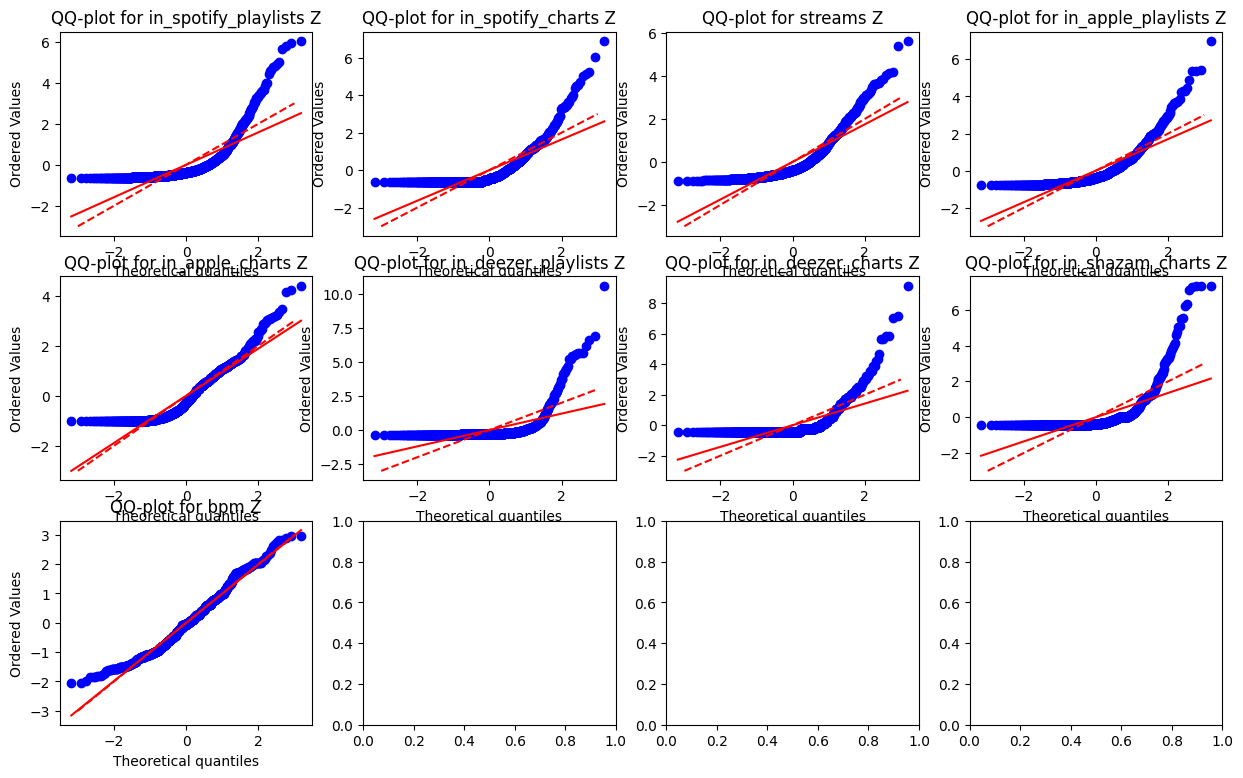

In [1677]:
def qq_plot(df: pd.DataFrame):
    col_names = df.columns[23:]
    num_plots = len(col_names)
    
    # Calculate the number of rows and columns for the grid
    num_rows = math.ceil(num_plots / 4)
    grid_cols = min(num_plots, 4)
    
    fig, axs = plt.subplots(num_rows, grid_cols, figsize=(15, num_rows*3))
    axs = axs.ravel()  # Flatten the array of axes to make it easier to iterate over
    
    for i, col in enumerate(col_names):
        stats.probplot(df[col], plot=axs[i])
        axs[i].set_title('QQ-plot for ' + col)
        axs[i].plot([-3, 3], [-3, 3], color='r', linestyle='--')

qq_plot(df_spotify)

In [1678]:
cols = ['bpm']
def normalize_cols(df: pd.DataFrame, cols: list):
    col_names = df.columns[:23]
    for col in col_names:
        if (col not in cols) and col != 'artist_count' and col not in percentage_features and df[col].dtype == 'float64' and col not in date_features:
            df[col] = normalize(df[col])
    return df
normalize_cols(df_spotify, cols)

,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,speechiness_%,in_spotify_playlists Z,in_spotify_charts Z,streams Z,in_apple_playlists Z,in_apple_charts Z,in_deezer_playlists Z,in_deezer_charts Z,in_shazam_charts Z,bpm Z
track_name,,,,,,,,,,,,,,,,,,,,,
Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2.0,2023,7,14,0.009874,1.000000,0.038170,0.063988,0.956364,...,0.04,-0.588758,6.896440,-0.657929,-0.287724,4.170501,-0.301230,1.214732,6.317955,0.087202
LALA,Myke Towers,1.0,2023,3,23,0.027295,0.326531,0.036101,0.071429,0.458182,...,0.04,-0.472135,1.838224,-0.671459,-0.229871,1.463112,-0.289730,1.877534,2.697352,-1.089065
vampire,Olivia Rodrigo,1.0,2023,6,30,0.025838,0.768707,0.037798,0.139881,0.752727,...,0.06,-0.481885,5.159275,-0.660361,0.302382,3.063831,-0.260539,1.877534,7.320959,0.550580
Cruel Summer,Taylor Swift,1.0,2019,8,23,0.148051,0.680272,0.216215,0.172619,0.752727,...,0.15,0.336248,4.495065,0.506043,0.556937,3.063831,-0.230464,1.546133,4.051001,1.691202
WHERE SHE GOES,Bad Bunny,1.0,2023,5,18,0.058676,0.340136,0.081869,0.125000,0.483636,...,0.06,-0.262062,1.940410,-0.372249,0.186675,1.601446,-0.264078,2.043235,3.047996,0.764446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
My Mind & Me,Selena Gomez,1.0,2022,11,3,0.017440,0.000000,0.024696,0.090774,0.047273,...,0.03,-0.538107,-0.614244,-0.746019,-0.079451,-0.769990,-0.308306,-0.276574,-0.417670,0.764446
Bigger Than The Whole Sky,Taylor Swift,1.0,2022,10,21,0.021734,0.000000,0.032903,0.005952,0.000000,...,0.06,-0.509363,-0.614244,-0.692365,-0.738981,-1.026896,-0.333959,-0.442275,-0.417670,1.548624
A Veces (feat. Feid),"Feid, Paulo Londra",2.0,2022,11,3,0.010252,0.000000,0.019847,0.002976,0.000000,...,0.06,-0.586225,-0.614244,-0.777719,-0.762123,-1.026896,-0.334844,-0.442275,-0.417670,-1.089065


In [1679]:
def standardize_cols(df: pd.DataFrame, cols: list):
    col_names = df.columns[:23]
    col_names_z = df.columns[23:]
    for col in col_names:
        if (col in cols) and col != 'artist_count' and col not in percentage_features and df[col].dtype == 'float64' and col not in date_features:
            df[col] = standardize(df[col])
    for col in col_names_z:
        df.drop(col, axis=1, inplace=True)   
    return df
standardize_cols(df_spotify, cols)


,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
track_name,,,,,,,,,,,,,,,,,,,,,
Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2.0,2023,7,14,0.009874,1.000000,0.038170,0.063988,0.956364,...,0.087202,B,Major,0.80,0.89,0.83,0.31,0.00,0.08,0.04
LALA,Myke Towers,1.0,2023,3,23,0.027295,0.326531,0.036101,0.071429,0.458182,...,-1.089065,C#,Major,0.71,0.61,0.74,0.07,0.00,0.10,0.04
vampire,Olivia Rodrigo,1.0,2023,6,30,0.025838,0.768707,0.037798,0.139881,0.752727,...,0.550580,F,Major,0.51,0.32,0.53,0.17,0.00,0.31,0.06
Cruel Summer,Taylor Swift,1.0,2019,8,23,0.148051,0.680272,0.216215,0.172619,0.752727,...,1.691202,A,Major,0.55,0.58,0.72,0.11,0.00,0.11,0.15
WHERE SHE GOES,Bad Bunny,1.0,2023,5,18,0.058676,0.340136,0.081869,0.125000,0.483636,...,0.764446,A,Minor,0.65,0.23,0.80,0.14,0.63,0.11,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
My Mind & Me,Selena Gomez,1.0,2022,11,3,0.017440,0.000000,0.024696,0.090774,0.047273,...,0.764446,A,Major,0.60,0.24,0.39,0.57,0.00,0.08,0.03
Bigger Than The Whole Sky,Taylor Swift,1.0,2022,10,21,0.021734,0.000000,0.032903,0.005952,0.000000,...,1.548624,F#,Major,0.42,0.07,0.24,0.83,0.01,0.12,0.06
A Veces (feat. Feid),"Feid, Paulo Londra",2.0,2022,11,3,0.010252,0.000000,0.019847,0.002976,0.000000,...,-1.089065,C#,Major,0.80,0.81,0.67,0.04,0.00,0.08,0.06


In [1680]:
def get_categorical_features(df):
    categorical_features = df.select_dtypes(include=['object'])
    return categorical_features
categorical_features = get_categorical_features(df_spotify)
categorical_features = categorical_features.drop(['mode', 'artist(s)_name'], axis=1)
categorical_features.reset_index(drop=True, inplace=True)

In [1681]:
categorical_features.head()

,key
0,B
1,C#
2,F
3,A
4,A


In [1682]:
# def label_encode_features(df):
#     encoder = LabelEncoder()
#     df['key'] = encoder.fit_transform(df['key'])
#     df['mode'] = encoder.fit_transform(df['mode'])
#     df['artist(s)_name'] = encoder.fit_transform(df['artist(s)_name'])
#     return df
# df_spotify = label_encode_features(df_spotify)

In [1683]:
encoder = LabelEncoder()
# Perform label encoding on the feature
df_spotify['mode'] = encoder.fit_transform(df_spotify['mode'])

In [1684]:
df_percentages = df_spotify[percentage_features]

In [1685]:
df_percentages = df_percentages.reset_index(drop=True)

In [1686]:
df_percentages

,danceability_%,energy_%,speechiness_%,acousticness_%,instrumentalness_%,liveness_%,valence_%
0,0.80,0.83,0.04,0.31,0.00,0.08,0.89
1,0.71,0.74,0.04,0.07,0.00,0.10,0.61
2,0.51,0.53,0.06,0.17,0.00,0.31,0.32
3,0.55,0.72,0.15,0.11,0.00,0.11,0.58
4,0.65,0.80,0.06,0.14,0.63,0.11,0.23
...,...,...,...,...,...,...,...
947,0.60,0.39,0.03,0.57,0.00,0.08,0.24
948,0.42,0.24,0.06,0.83,0.01,0.12,0.07
949,0.80,0.67,0.06,0.04,0.00,0.08,0.81
950,0.82,0.77,0.05,0.08,0.00,0.12,0.67


In [1687]:

def low_variance_removal(df, threshold, target_variable):
    # Create a VarianceThreshold feature selector

    df = df.drop([target_variable, 'artist(s)_name', 'key'], axis=1)

    selector = feature_selection.VarianceThreshold(threshold)

    # Fit and transform the selector on our data
    variance_filtered = selector.fit_transform(df)

    df = pd.DataFrame(variance_filtered, columns=df.columns[selector.get_support()])

    print('Features with variance > {}:\n'.format(threshold), df.columns.tolist())

    return df
    
feature_selection_low_variance = low_variance_removal(df_spotify, 0.8, 'mode')
feature_selection_low_variance

Features with variance > 0.8:
 ['released_year', 'released_month', 'released_day', 'bpm']


,released_year,released_month,released_day,bpm
0,2023.0,7.0,14.0,0.087202
1,2023.0,3.0,23.0,-1.089065
2,2023.0,6.0,30.0,0.550580
3,2019.0,8.0,23.0,1.691202
4,2023.0,5.0,18.0,0.764446
...,...,...,...,...
947,2022.0,11.0,3.0,0.764446
948,2022.0,10.0,21.0,1.548624
949,2022.0,11.0,3.0,-1.089065
950,2022.0,10.0,20.0,-0.910843


In [1688]:
feature_selection_low_variance

,released_year,released_month,released_day,bpm
0,2023.0,7.0,14.0,0.087202
1,2023.0,3.0,23.0,-1.089065
2,2023.0,6.0,30.0,0.550580
3,2019.0,8.0,23.0,1.691202
4,2023.0,5.0,18.0,0.764446
...,...,...,...,...
947,2022.0,11.0,3.0,0.764446
948,2022.0,10.0,21.0,1.548624
949,2022.0,11.0,3.0,-1.089065
950,2022.0,10.0,20.0,-0.910843


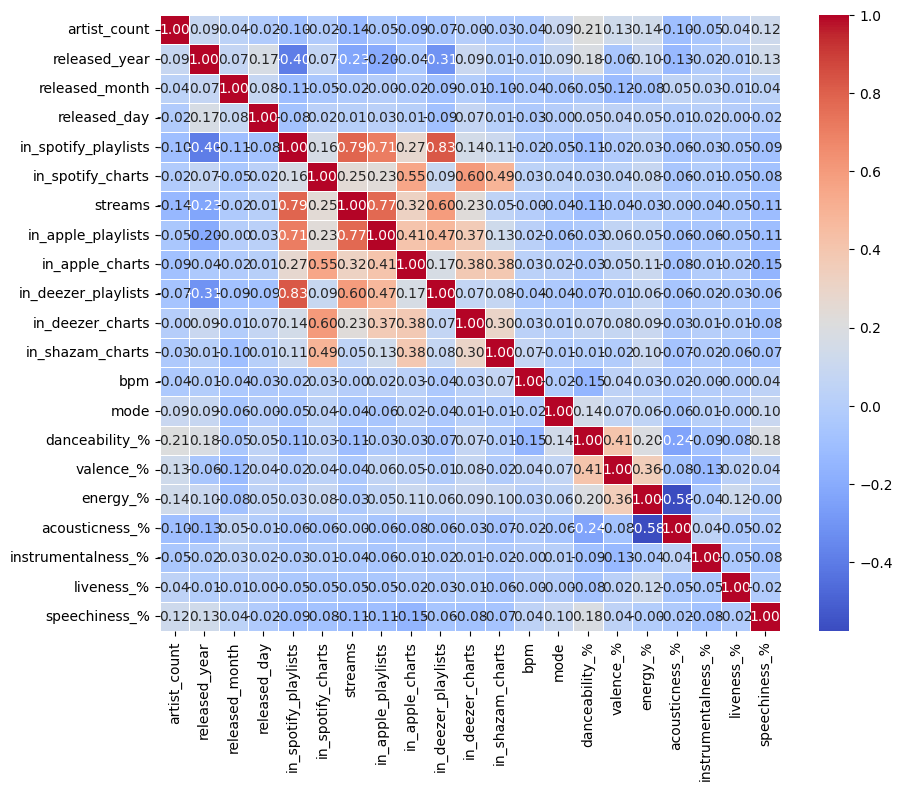

In [1689]:

def plot_correlation(df):
    correlation_matrix = df.corr(numeric_only=True)
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.show()
plot_correlation(df_spotify)

In [1690]:
def remove_correlated_features(df, threshold, target_variable):
    # calculate the correlation matrix

    df = df.drop([target_variable, 'artist(s)_name', 'key'], axis=1)

    corr_matrix = df.corr()

    # doing iterations equal to the number of features
    for _ in df.columns.to_list():
        
        # set the correlation of the feature with itself to 0
        corr_matrix[corr_matrix == 1] = 0
        
        to_drop = None
        
        # get the features that are highly correlated with eachother
        correlated_features = [column for column in corr_matrix.columns if any(corr_matrix[column] > threshold)]
        print('The following features are correlated with eachother:\n', correlated_features)
        # if there are any correlated features grab the first one, if not break
        if len(correlated_features) > 0:
            to_drop = correlated_features[0]
        else:
            break
        
        print('The feature {} is highly correlated with another feature. Dropping it.\n'.format(to_drop))
        
        # drop the feature selected
        df = df.drop(to_drop, axis=1)
        
        # recalculate the correlation matrix
        corr_matrix = df.corr()

    return df
feature_selection_high_correlation = remove_correlated_features(df_spotify, 0.7, 'mode')
feature_selection_high_correlation.reset_index(drop=True, inplace=True)

The following features are correlated with eachother:
 ['in_spotify_playlists', 'streams', 'in_apple_playlists', 'in_deezer_playlists']
The feature in_spotify_playlists is highly correlated with another feature. Dropping it.

The following features are correlated with eachother:
 ['streams', 'in_apple_playlists']
The feature streams is highly correlated with another feature. Dropping it.

The following features are correlated with eachother:
 []


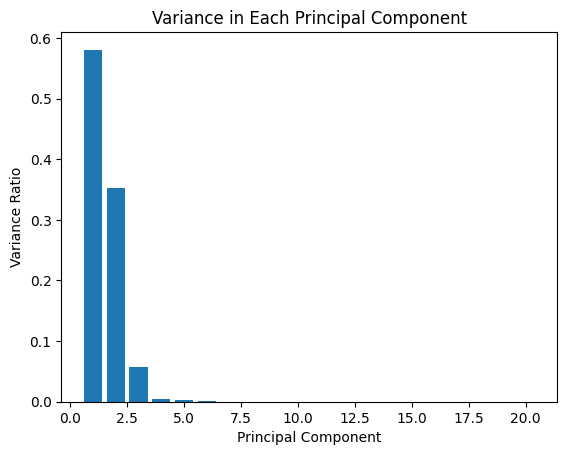

In [1691]:
def plot_variance(df, target_variable):
    df = df.drop([target_variable, 'artist(s)_name', 'key'], axis=1)
    pca = PCA()
    df_pca = pca.fit_transform(df)
    df_pca = pd.DataFrame(df_pca, columns=['PC'+ str(i) for i in range(1, len(df.columns)+1)])
    variance_ratio = pca.explained_variance_ratio_
    num_components = len(variance_ratio)
    plt.bar(range(1, num_components + 1), variance_ratio)
    plt.xlabel('Principal Component')
    plt.ylabel('Variance Ratio')
    plt.title('Variance in Each Principal Component')
    plt.show()
    return df_pca

df_pca = plot_variance(df_spotify, 'mode')


In [1692]:
def apply_PCA(df, target_variable, n_components, flag):
    if flag == True:
        df = df.drop([target_variable, 'artist(s)_name', 'key'], axis=1)
    pca = PCA(n_components=n_components)
    df_pca = pca.fit_transform(df)
    df_pca = pd.DataFrame(df_pca, columns=['PC'+ str(i) for i in range(1, n_components+1)])
    return df_pca
df_pca = apply_PCA(df_spotify, 'mode', 2, True)
df_pca

,PC1,PC2
0,-4.431275,-1.668519
1,-7.619489,6.619186
2,-10.286434,13.181055
3,-4.050477,8.191586
4,-5.836265,2.009148
...,...,...
947,0.435210,-11.434537
948,-6.161276,5.267582
949,0.424619,-11.434822
950,-5.811174,4.334108


In [1693]:
def apply_KMeans(df):
    avg_silhouette = []
    for i in range(2, 11):
        kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
        kmeans.fit(df)
        cluster_labels = kmeans.labels_
        silhouette_avg = silhouette_score(df, cluster_labels)
        print("For n_clusters =", i, "The average silhouette_score is :", silhouette_avg)
        avg_silhouette.append(silhouette_avg)
    return df, avg_silhouette
df_spotify_kmeans, avg_silhouette1 = apply_KMeans(feature_selection_low_variance)

For n_clusters = 2 The average silhouette_score is : 0.7203108829290629
For n_clusters = 3 The average silhouette_score is : 0.47814854022113484
For n_clusters = 4 The average silhouette_score is : 0.48775085220676445
For n_clusters = 5 The average silhouette_score is : 0.3544418596863807
For n_clusters = 6 The average silhouette_score is : 0.36782133613095913
For n_clusters = 7 The average silhouette_score is : 0.3209989373943191
For n_clusters = 8 The average silhouette_score is : 0.3168969291238528
For n_clusters = 9 The average silhouette_score is : 0.32801461251210845
For n_clusters = 10 The average silhouette_score is : 0.3358468625625371


In [1694]:
df_spotify_kmeans, avg_silhouette2 = apply_KMeans(feature_selection_high_correlation)

For n_clusters = 2 The average silhouette_score is : 0.7182173694715669
For n_clusters = 3 The average silhouette_score is : 0.4718039575137818
For n_clusters = 4 The average silhouette_score is : 0.4809597581340057
For n_clusters = 5 The average silhouette_score is : 0.3453932584980903
For n_clusters = 6 The average silhouette_score is : 0.35579774346390153
For n_clusters = 7 The average silhouette_score is : 0.30554861013342544
For n_clusters = 8 The average silhouette_score is : 0.3127322003400633
For n_clusters = 9 The average silhouette_score is : 0.3169958246311483
For n_clusters = 10 The average silhouette_score is : 0.30098363943939044


In [1695]:
df_spotify_kmeans, avg_silhouette3 = apply_KMeans(df_pca)

For n_clusters = 2 The average silhouette_score is : 0.7427777028223719
For n_clusters = 3 The average silhouette_score is : 0.5600367669898348
For n_clusters = 4 The average silhouette_score is : 0.5738823449964374
For n_clusters = 5 The average silhouette_score is : 0.4765297990239757
For n_clusters = 6 The average silhouette_score is : 0.5009282720622438
For n_clusters = 7 The average silhouette_score is : 0.4726689709206118
For n_clusters = 8 The average silhouette_score is : 0.47494944033829006
For n_clusters = 9 The average silhouette_score is : 0.47731052833470666
For n_clusters = 10 The average silhouette_score is : 0.4981597382390546


In [1696]:
df_spotify_kmeans, avg_silhouette4 = apply_KMeans(df_percentages)

For n_clusters = 2 The average silhouette_score is : 0.31954924282395825
For n_clusters = 3 The average silhouette_score is : 0.2553811866741692
For n_clusters = 4 The average silhouette_score is : 0.22807058259608376
For n_clusters = 5 The average silhouette_score is : 0.22236928413817958
For n_clusters = 6 The average silhouette_score is : 0.18703582869492286
For n_clusters = 7 The average silhouette_score is : 0.17663011544606105
For n_clusters = 8 The average silhouette_score is : 0.17969243082995673
For n_clusters = 9 The average silhouette_score is : 0.1783095078848192
For n_clusters = 10 The average silhouette_score is : 0.17632272683958064


In [1697]:
def plot_silhouette(avg_silhouette1, avg_silhouette2, avg_silhouette3, avg_silhouette4):
    fig, axs = plt.subplots(1, 4, figsize=(15, 5))
    
    axs[0].plot(range(2, 11), avg_silhouette1, 'bx-')
    axs[0].set_xlabel('Values of K')
    axs[0].set_ylabel('Silhouette score')
    axs[0].set_title('Low Variance Features')
    
    axs[1].plot(range(2, 11), avg_silhouette2, 'bx-')
    axs[1].set_xlabel('Values of K')
    axs[1].set_ylabel('Silhouette score')
    axs[1].set_title('Highly Correlated Features')
    
    axs[2].plot(range(2, 11), avg_silhouette3, 'bx-')
    axs[2].set_xlabel('Values of K')
    axs[2].set_ylabel('Silhouette score')
    axs[2].set_title('PCA')

    axs[3].plot(range(2, 11), avg_silhouette4, 'bx-')
    axs[3].set_xlabel('Values of K')
    axs[3].set_ylabel('Silhouette score')
    axs[3].set_title('Percentages')
    
    plt.tight_layout()
    plt.show()

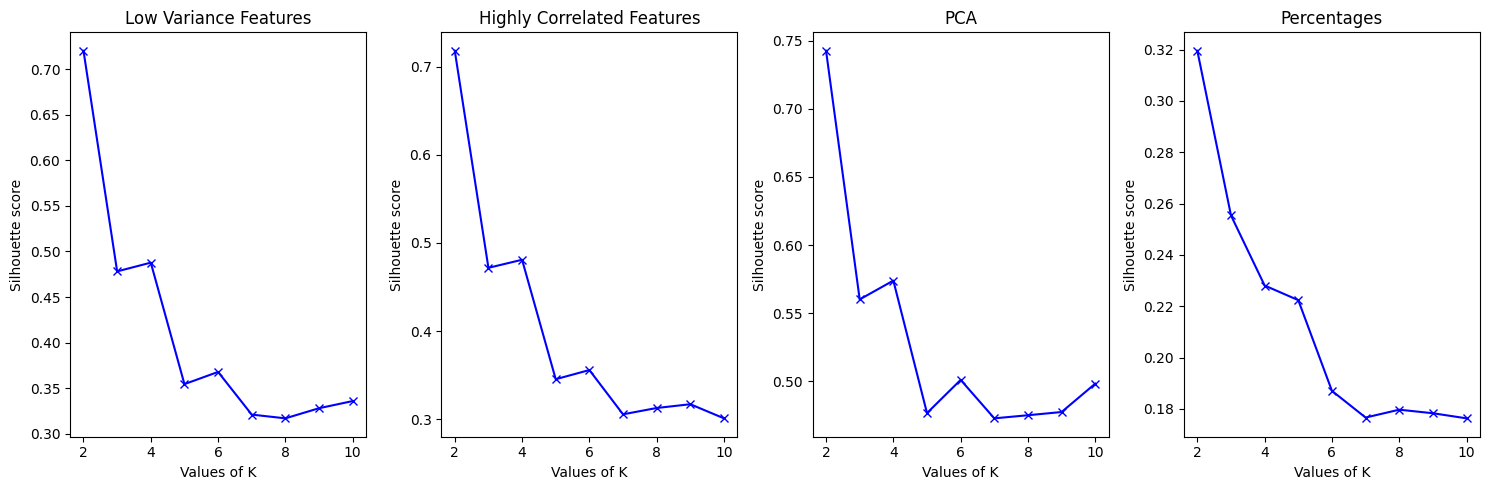

In [1698]:
plot_silhouette(avg_silhouette1, avg_silhouette2, avg_silhouette3, avg_silhouette4)

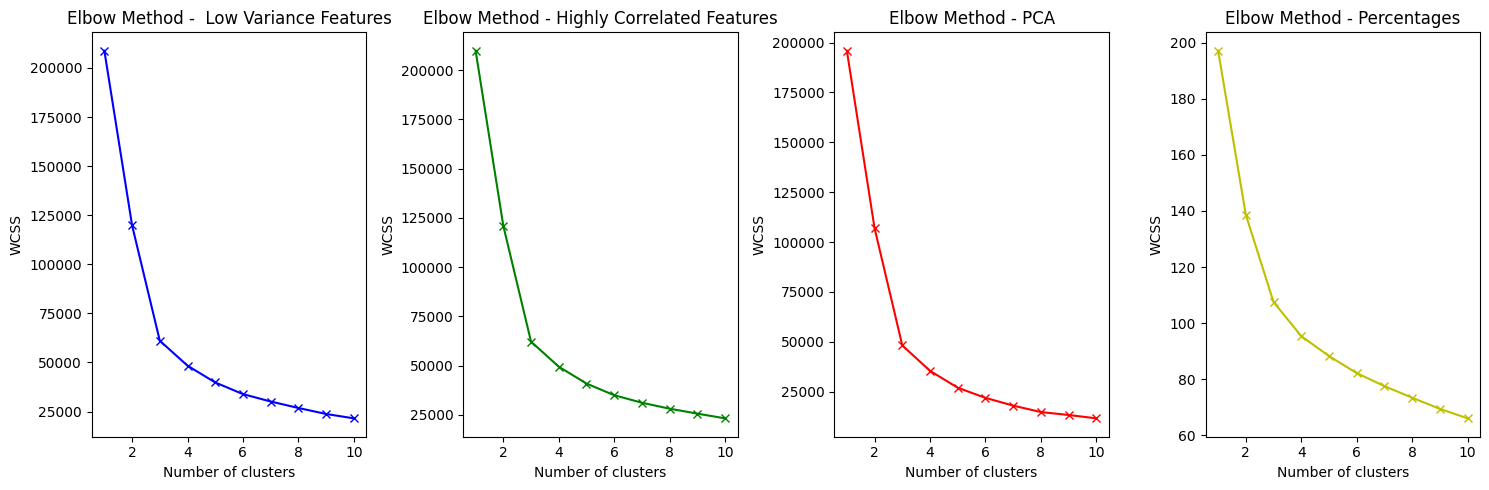

In [1699]:
def elbow_method(df1, df2, df3, df4):
    wcss1 = []
    wcss2 = []
    wcss3 = []
    wcss4 = []
    
    fig, axs = plt.subplots(1, 4, figsize=(15, 5))
    
    for i in range(1, 11):
        kmeans1 = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans1.fit(df1)
        wcss1.append(kmeans1.inertia_)
        
        kmeans2 = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans2.fit(df2)
        wcss2.append(kmeans2.inertia_)
        
        kmeans3 = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans3.fit(df3)
        wcss3.append(kmeans3.inertia_)

        kmeans4 = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans4.fit(df4)
        wcss4.append(kmeans4.inertia_)
    
    axs[0].plot(range(1, 11), wcss1, 'bx-', label='Dataframe 1')
    axs[0].set_title('Elbow Method -  Low Variance Features')
    axs[0].set_xlabel('Number of clusters')
    axs[0].set_ylabel('WCSS')
    
    axs[1].plot(range(1, 11), wcss2, 'gx-', label='Dataframe 2')
    axs[1].set_title('Elbow Method - Highly Correlated Features')
    axs[1].set_xlabel('Number of clusters')
    axs[1].set_ylabel('WCSS')
    
    axs[2].plot(range(1, 11), wcss3, 'rx-', label='Dataframe 3')
    axs[2].set_title('Elbow Method - PCA')
    axs[2].set_xlabel('Number of clusters')
    axs[2].set_ylabel('WCSS')

    axs[3].plot(range(1, 11), wcss4, 'yx-', label='Dataframe 4')
    axs[3].set_title('Elbow Method - Percentages')
    axs[3].set_xlabel('Number of clusters')
    axs[3].set_ylabel('WCSS')
    
    plt.tight_layout()
    plt.show()

elbow_method(feature_selection_low_variance, feature_selection_high_correlation, df_pca, df_percentages)

In [1700]:
def apply_best_KMeans(df):
    kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit_predict(df)
    cluster_labels = kmeans.labels_
    return df, cluster_labels, kmeans
df_spotify_kmeans, cluster_labels, km = apply_best_KMeans(df_pca)

In [1701]:
df_comparison = pd.DataFrame({'mode': df_spotify['mode'], 'cluster_labels': cluster_labels})
def calculate_same_value_percentage(df, column1, column2):
    total_rows = len(df)
    same_value_rows = len(df[df[column1] == df[column2]])
    percentage = (same_value_rows / total_rows) * 100
    return percentage
print(calculate_same_value_percentage(df_comparison, 'mode', 'cluster_labels'))

55.5672268907563


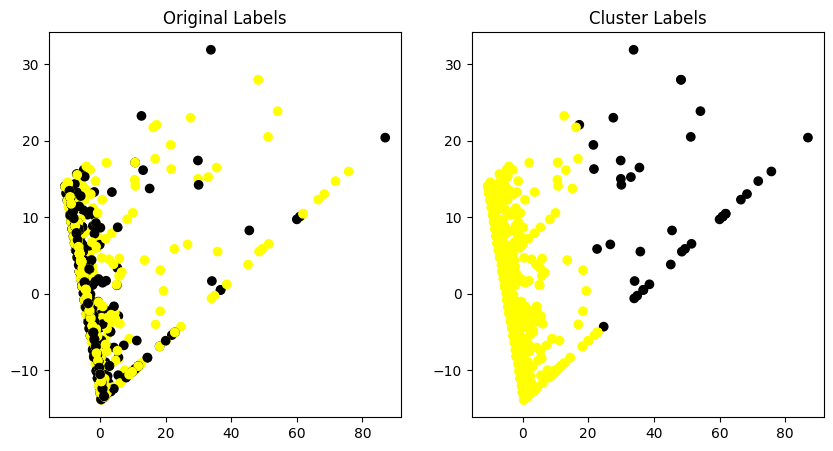

In [1702]:
def plot_clusters_vs_groundtruth(df, cluster_labels, target_variable, df_original):
    cmap = mcolors.ListedColormap(['yellow', 'black'])
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df_original[target_variable], cmap=cmap)
    plt.title('Original Labels')

    # Plot cluster labels
    plt.subplot(1, 2, 2)
    plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=cluster_labels, cmap=cmap)
    plt.title('Cluster Labels')

    plt.show()

plot_clusters_vs_groundtruth(df_pca, cluster_labels, 'mode', df_spotify)

In [1703]:
def apply_hierarchical_clustering(df):
    silhouette_scores = []
    for i in range (2, 11):
        hc = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage ='ward')
        hc = hc.fit(df)
        cluster_labels = hc.labels_
        silhouette_avg = silhouette_score(df, cluster_labels)
        print("For n_clusters =", i, "The average silhouette_score is :", silhouette_avg)
        silhouette_scores.append(silhouette_avg)
    return silhouette_scores
silhouette_avg1 = apply_hierarchical_clustering(feature_selection_low_variance)


c:\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  

For n_clusters = 2 The average silhouette_score is : 0.6922361700251847
For n_clusters = 3 The average silhouette_score is : 0.4542981885180977
For n_clusters = 4 The average silhouette_score is : 0.45275552693433163
For n_clusters = 5 The average silhouette_score is : 0.4404202885862915
For n_clusters = 6 The average silhouette_score is : 0.34870414878731826
For n_clusters = 7 The average silhouette_score is : 0.35488480041715
For n_clusters = 8 The average silhouette_score is : 0.3046716526191768
For n_clusters = 9 The average silhouette_score is : 0.3190231438828785
For n_clusters = 10 The average silhouette_score is : 0.32715734229407184


c:\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [1704]:
silhouette_avg2 = apply_hierarchical_clustering(feature_selection_high_correlation)

c:\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.7323602310555078
For n_clusters = 3 The average silhouette_score is : 0.4673655988967789
For n_clusters = 4 The average silhouette_score is : 0.44521062255669724


c:\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.4543334628250297
For n_clusters = 6 The average silhouette_score is : 0.33755063027878385
For n_clusters = 7 The average silhouette_score is : 0.33891267622361715


c:\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


For n_clusters = 8 The average silhouette_score is : 0.2716785301744903
For n_clusters = 9 The average silhouette_score is : 0.27673485672337617
For n_clusters = 10 The average silhouette_score is : 0.28484691697439685


c:\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [1705]:
silhouette_avg3 = apply_hierarchical_clustering(df_pca)

c:\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


For n_clusters =

c:\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


 2 The average silhouette_score is : 0.7627137826749408
For n_clusters = 3 The average silhouette_score is : 0.5215365164692526
For n_clusters = 4 The average silhouette_score is : 0.5504187778080688


c:\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.5535371052053996
For n_clusters = 6 The average silhouette_score is : 0.4734734471298544


c:\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


For n_clusters = 7 The average silhouette_score is : 0.4297184459601763
For n_clusters = 8 The average silhouette_score is : 0.43097108621172014
For n_clusters = 9 The average silhouette_score is : 0.45559520363682665
For n_clusters = 10 The average silhouette_score is : 0.46660225838674924


c:\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [1706]:
silhouette_avg4 = apply_hierarchical_clustering(df_percentages)

c:\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.304041012728545
For n_clusters = 3 The average silhouette_score is : 0.17407053309456552


c:\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  

For n_clusters = 4 The average silhouette_score is : 0.1667600639708884
For n_clusters = 5 The average silhouette_score is : 0.13115488454962124
For n_clusters = 6 The average silhouette_score is : 0.13993835558822737
For n_clusters = 7 The average silhouette_score is : 0.11580134551204381


c:\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


For n_clusters = 8 The average silhouette_score is : 0.11334414359843593
For n_clusters = 9 The average silhouette_score is : 0.1189803843880196
For n_clusters = 10 The average silhouette_score is : 0.1252238758553201


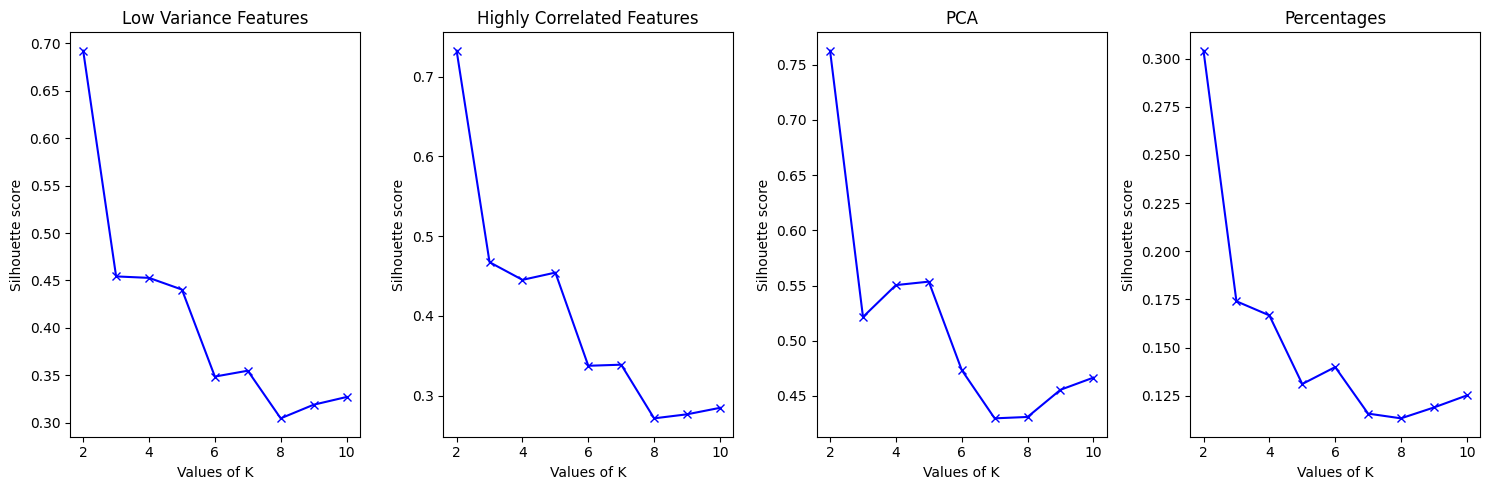

In [1707]:
plot_silhouette(silhouette_avg1, silhouette_avg2, silhouette_avg3, silhouette_avg4)

In [1708]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
def model_for_dendrogram(df):
    model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
    model = model.fit(df)
    return model

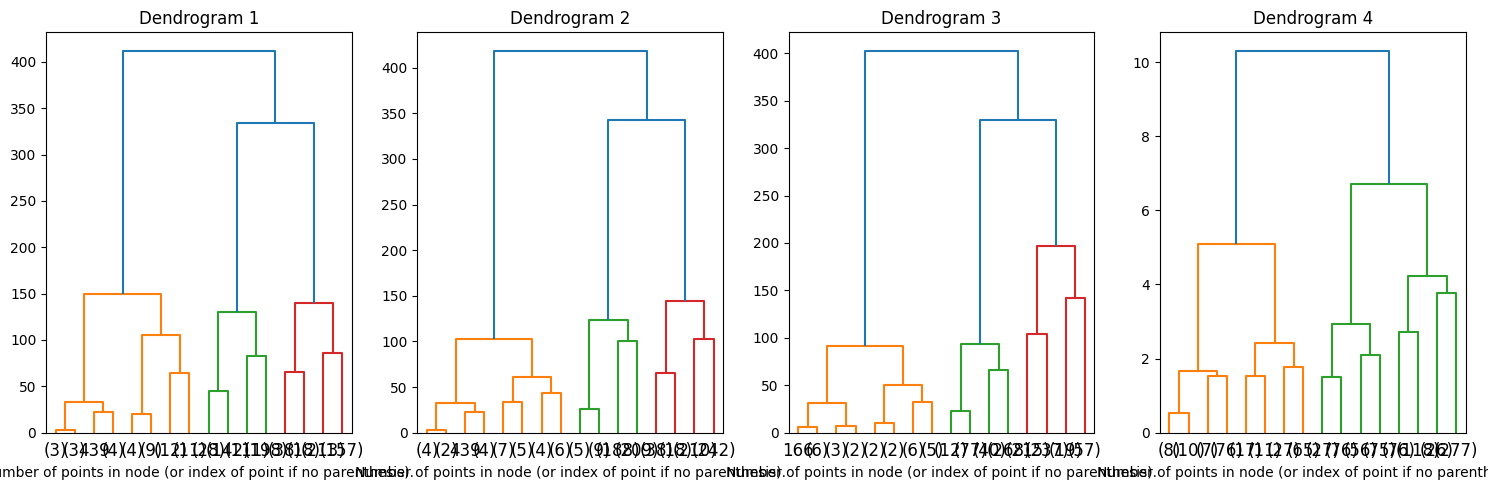

In [1709]:
import matplotlib.pyplot as plt

def plot_dendrogram_subplot(models):
    fig, axs = plt.subplots(1, 4, figsize=(15, 5))
    
    for i, model in enumerate(models):
        axs[i].set_title(f"Dendrogram {i+1}")
        axs[i].set_xlabel("Number of points in node (or index of point if no parenthesis).")
        plot_dendrogram(model, truncate_mode="level", p=3, ax=axs[i])
    
    plt.tight_layout()
    plt.show()

# Usage example:
models = [
    model_for_dendrogram(feature_selection_low_variance),
    model_for_dendrogram(feature_selection_high_correlation),
    model_for_dendrogram(df_pca),
    model_for_dendrogram(df_percentages)
]

plot_dendrogram_subplot(models)

In [1710]:
def apply_best_hierarchical_clustering(df):
    hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage ='ward')
    cluster_labels = hc.fit_predict(df)
    return cluster_labels
cluster_labels = apply_best_hierarchical_clustering(df_pca)

c:\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [1711]:
df_comparison = pd.DataFrame({'mode': df_spotify['mode'], 'cluster_labels': cluster_labels})
print(calculate_same_value_percentage(df_comparison, 'mode', 'cluster_labels'))

56.30252100840336


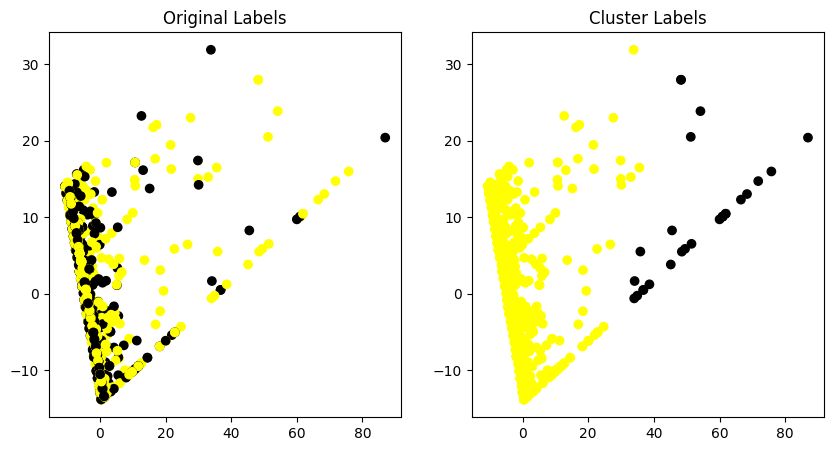

In [1712]:
plot_clusters_vs_groundtruth(df_pca, cluster_labels, 'mode', df_spotify)

In [1713]:
def apply_kmodes(df):
    # One-hot encoding
    encoded_df = pd.get_dummies(df['key'], prefix='key')
    # Drop the original feature from the DataFrame
    df = df.drop(columns=['key'])
    # Join the encoded DataFrame with the original DataFrame
    df = df.join(encoded_df)
    cost = []
    avg_silhouette = []
    K = range(2, 11)
    for num_clusters in K:
        kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
        kmode.fit_predict(df)
        cost.append(kmode.cost_)
        cluster_labels = kmode.labels_
        silhouette_avg = silhouette_score(df, cluster_labels)
        print("For n_clusters =", num_clusters, "The average silhouette_score is :", silhouette_avg)
        avg_silhouette.append(silhouette_avg)
    return avg_silhouette, cost

avg_silhouette, cost = apply_kmodes(categorical_features)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 863.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 737.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 737.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 737.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 871.0
Best run was number 2
For n_clusters = 2 The average silhouette_score is : 0.3068910988308349
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 675.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 81, cost: 797.0
Init: initializi

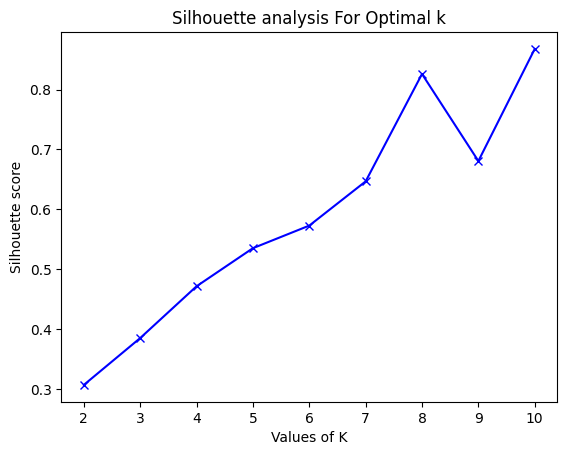

In [1714]:
def plot_silhouette_kmodes(avg_silhouette):
    plt.plot(range(2, 11),avg_silhouette, 'bx-')
    plt.xlabel('Values of K')
    plt.ylabel('Silhouette score')
    plt.title('Silhouette analysis For Optimal k')
    plt.show()
plot_silhouette_kmodes(avg_silhouette)

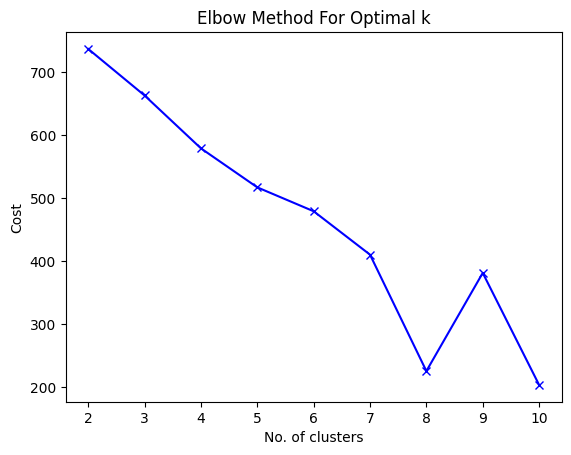

In [1715]:
def plot_elbow_method_kmodes(cost):
    plt.plot(range(2,11), cost, 'bx-')
    plt.xlabel('No. of clusters')
    plt.ylabel('Cost')
    plt.title('Elbow Method For Optimal k')
    plt.show()
plot_elbow_method_kmodes(cost)

In [1716]:
def apply_kmodes_2(df):
    encoded_df = pd.get_dummies(df['key'], prefix='key')
    # Drop the original feature from the DataFrame
    df = df.drop(columns=['key'])
    # Join the encoded DataFrame with the original DataFrame
    df = df.join(encoded_df)
    np.random.seed(0) # set seed
    kmode = KModes(n_clusters=2, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(df)
    cluster_labels = kmode.labels_
    return cluster_labels
cluster_labels = apply_kmodes_2(categorical_features)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 890.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 952.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 737.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 879.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 861.0
Best run was number 3


In [1717]:
df_comparison = pd.DataFrame({'mode': df_spotify['mode'], 'cluster_labels': cluster_labels})
print(calculate_same_value_percentage(df_comparison, 'mode', 'cluster_labels'))

49.159663865546214


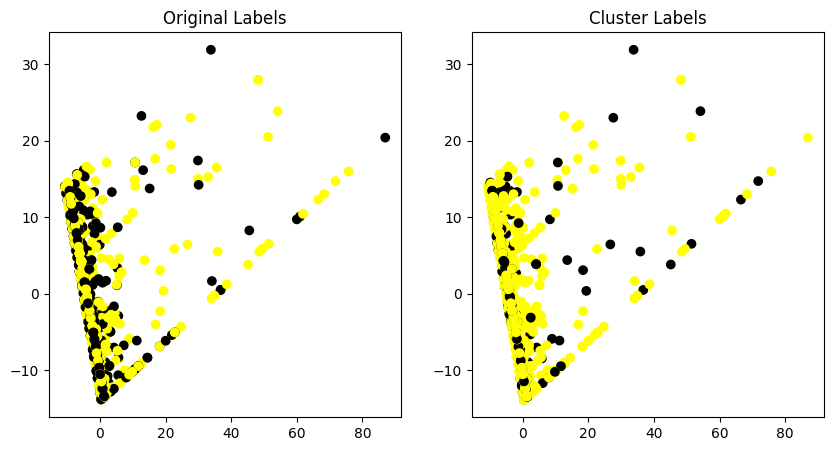

In [1718]:
plot_clusters_vs_groundtruth(df_pca, cluster_labels, 'mode', df_spotify)

In [1627]:
def split_data(df, target_variable, df_original):
    X = df
    Y = df_original[target_variable]
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, 
        test_size=0.3, 
        train_size=0.7,
        random_state=7,
        shuffle=True,
        stratify=Y
    )
    return X_train, X_test, Y_train, Y_test

X_train, X_test, Y_train, Y_test = split_data(feature_selection_low_variance, 'mode', df_spotify)

In [1628]:
def logistic_regression(X_train, X_test, Y_train, Y_test):
    # Create a logistic regression model
    log_model = LogisticRegression()

    # Train the model
    log_model.fit(X_train, Y_train)

    # Make predictions on the test data
    predictions = log_model.predict(X_test)

    # Get the accuracy score
    accuracy = accuracy_score(Y_test, predictions)
    print('Accuracy:', accuracy)

    recall = recall_score(Y_test, predictions, average='weighted')
    print('Recall:', recall)

    precision = precision_score(Y_test, predictions, average='weighted')
    print('Precision:', precision)

    f1 = f1_score(Y_test, predictions, average='weighted')
    print('F1 Score:', f1)
    
    return log_model, predictions

log_model, predictions = logistic_regression(X_train, X_test, Y_train, Y_test)

Accuracy: 0.5629370629370629
Recall: 0.08264462809917356
Precision: 0.4166666666666667
F1 Score: 0.13793103448275862


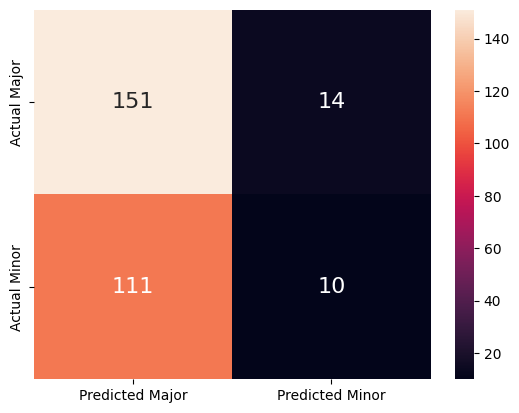

In [1629]:
def plot_confusion_matrix(Y_test, predictions):
    # calculate the confusion matrix
    conf_mat = sk_confusion_matrix(Y_test, predictions)

    conf_frame = pd.DataFrame(conf_mat, 
                            columns=['Predicted Major', 'Predicted Minor'], 
                            index=['Actual Major', 'Actual Minor'])

    sns.heatmap(conf_frame, annot=True, fmt='d', annot_kws={"size": 16})
    plt.show()
plot_confusion_matrix(Y_test, predictions)


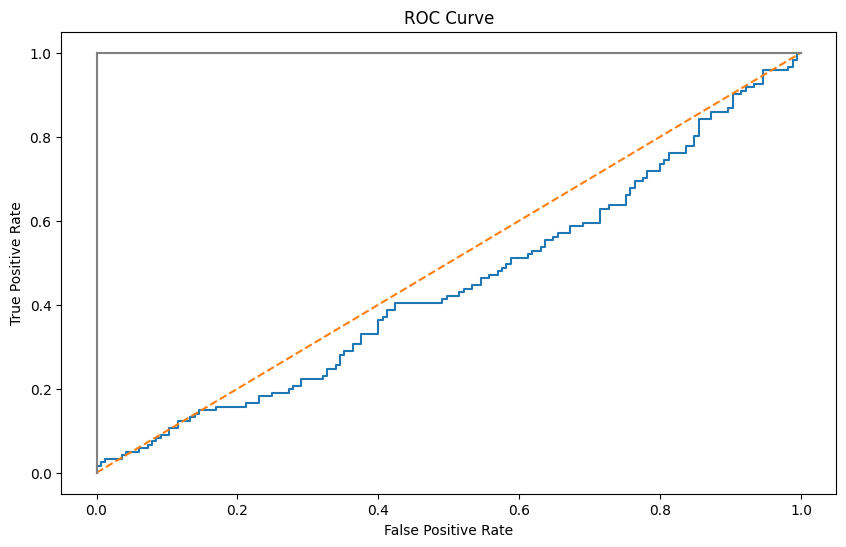

In [1630]:
def plot_roc_curve(log_model, X_test, Y_test):
    # Get the predicted probabilities
    y_pred_prob = log_model.predict_proba(X_test)[:,1]

    # Create true and false positive rates
    false_positive_rate, true_positive_rate, threshold = roc_curve(Y_test, y_pred_prob)

    # Plot ROC curve
    plt.figure(figsize=(10,6))
    plt.title('ROC Curve')
    plt.plot(false_positive_rate, true_positive_rate)
    plt.plot([0,1], ls='--')
    plt.plot([0,0],[1,0], c='.5')
    plt.plot([1,1], c='.5')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

plot_roc_curve(log_model, X_test, Y_test)

Accuracy: 0.5314685314685315
Recall: 0.2066115702479339
Precision: 0.3968253968253968
F1 Score: 0.2717391304347826


c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


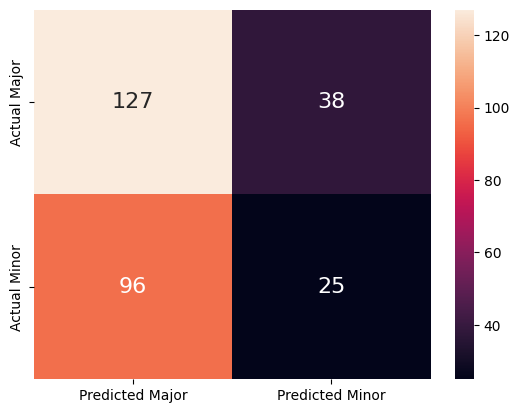

In [1631]:
X_train, X_test, Y_train, Y_test = split_data(feature_selection_high_correlation, 'mode', df_spotify)
log_model, predictions = logistic_regression(X_train, X_test, Y_train, Y_test)
plot_confusion_matrix(Y_test, predictions)

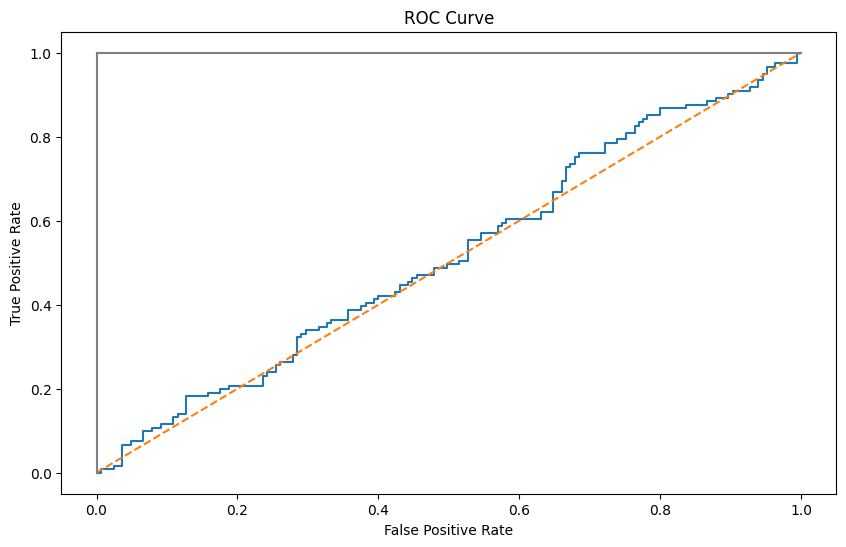

In [1632]:
plot_roc_curve(log_model, X_test, Y_test)

Accuracy: 0.5769230769230769
Recall: 0.0
Precision: 0.0
F1 Score: 0.0


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


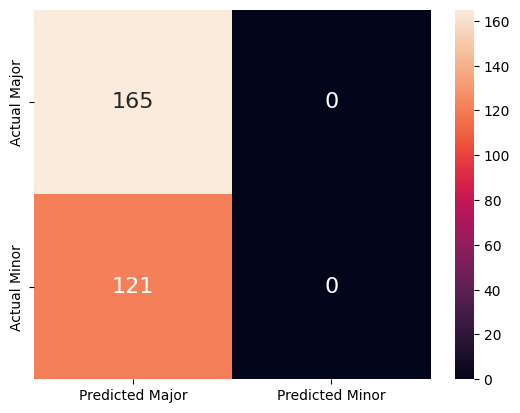

In [1633]:
X_train, X_test, Y_train, Y_test = split_data(df_pca, 'mode', df_spotify)
log_model, predictions = logistic_regression(X_train, X_test, Y_train, Y_test)
plot_confusion_matrix(Y_test, predictions)

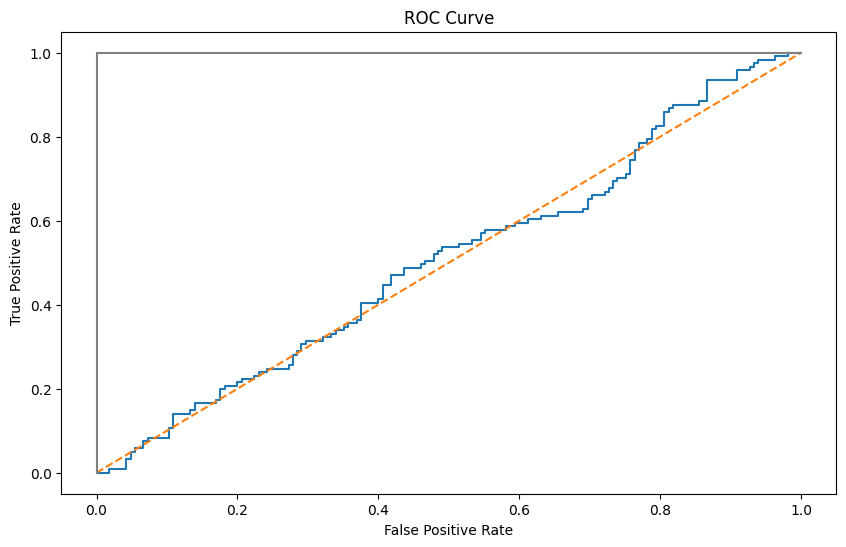

In [1634]:
plot_roc_curve(log_model, X_test, Y_test)

Accuracy: 0.5804195804195804
Recall: 0.12396694214876033
Precision: 0.5172413793103449
F1 Score: 0.2


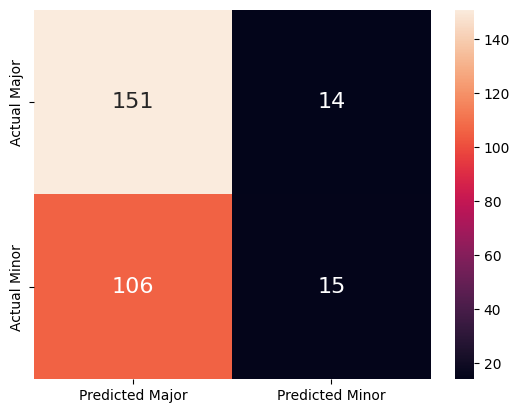

In [1635]:
X_train, X_test, Y_train, Y_test = split_data(df_percentages, 'mode', df_spotify)
log_model, predictions = logistic_regression(X_train, X_test, Y_train, Y_test)
plot_confusion_matrix(Y_test, predictions)

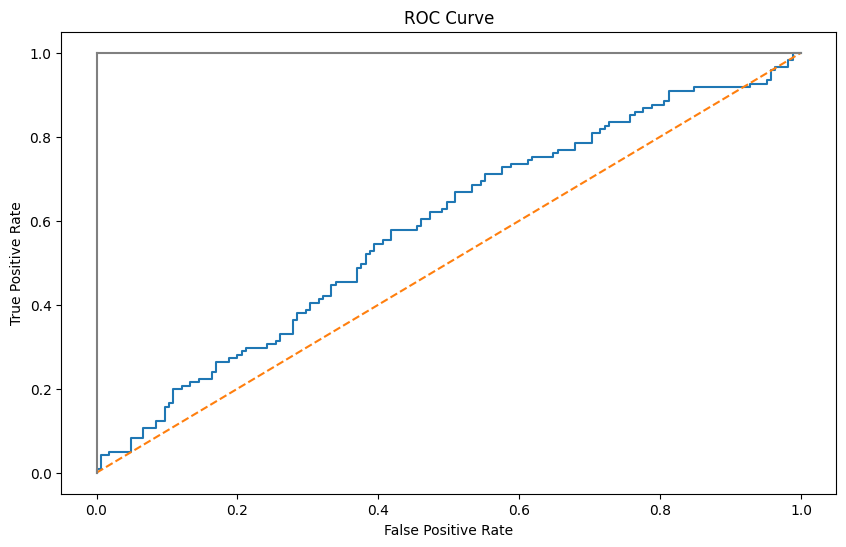

In [1636]:
plot_roc_curve(log_model, X_test, Y_test)

In [1637]:
def random_forest(X_train, X_test, Y_train, Y_test):
    # Create a random forest classifier

    rf_model = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=42)

    # Train the model

    rf_model.fit(X_train, Y_train)

    # Make predictions on the test data

    predictions = rf_model.predict(X_test)

    accuracy = accuracy_score(Y_test, predictions)
    print('Accuracy:', accuracy)

    recall = recall_score(Y_test, predictions, average='weighted')
    print('Recall:', recall)

    precision = precision_score(Y_test, predictions, average='weighted')
    print('Precision:', precision)

    f1 = f1_score(Y_test, predictions, average='weighted')
    print('F1 Score:', f1)

    return rf_model, predictions

Accuracy: 0.5594405594405595
Recall: 0.024793388429752067
Precision: 0.2727272727272727
F1 Score: 0.04545454545454545


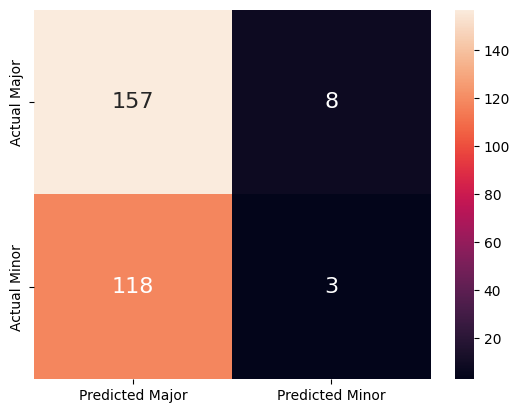

In [1638]:
X_train, X_test, Y_train, Y_test = split_data(feature_selection_low_variance, 'mode', df_spotify)
rf_model, predictions = random_forest(X_train, X_test, Y_train, Y_test)
plot_confusion_matrix(Y_test, predictions)

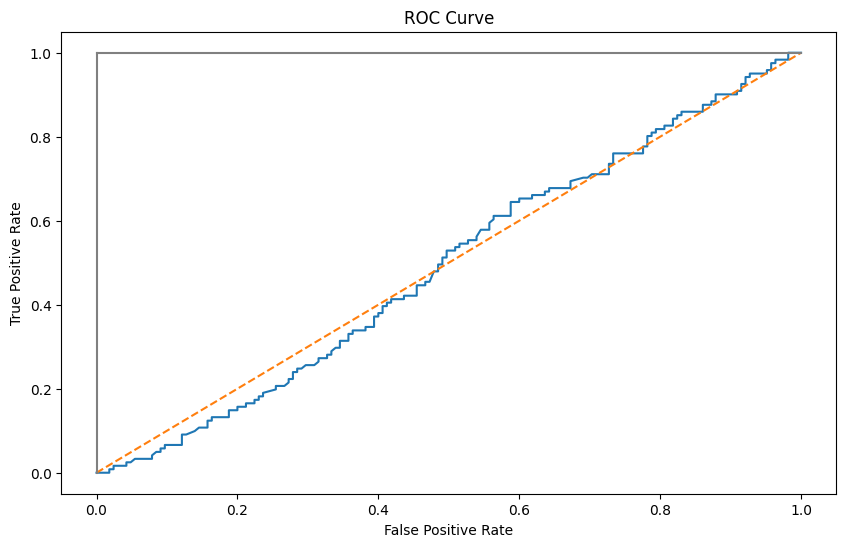

In [1639]:
plot_roc_curve(rf_model, X_test, Y_test)

Accuracy: 0.5384615384615384
Recall: 0.01652892561983471
Precision: 0.13333333333333333
F1 Score: 0.029411764705882356


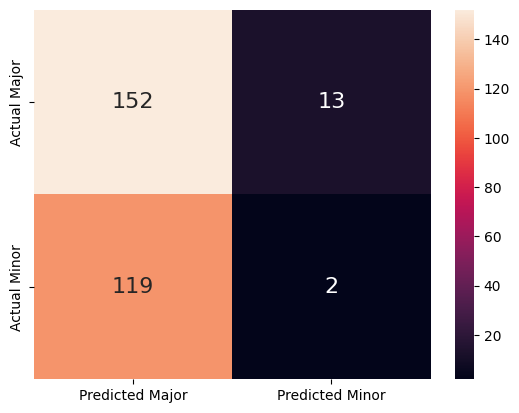

In [1640]:
X_train, X_test, Y_train, Y_test = split_data(feature_selection_high_correlation, 'mode', df_spotify)
rf_model, predictions = random_forest(X_train, X_test, Y_train, Y_test)
plot_confusion_matrix(Y_test, predictions)

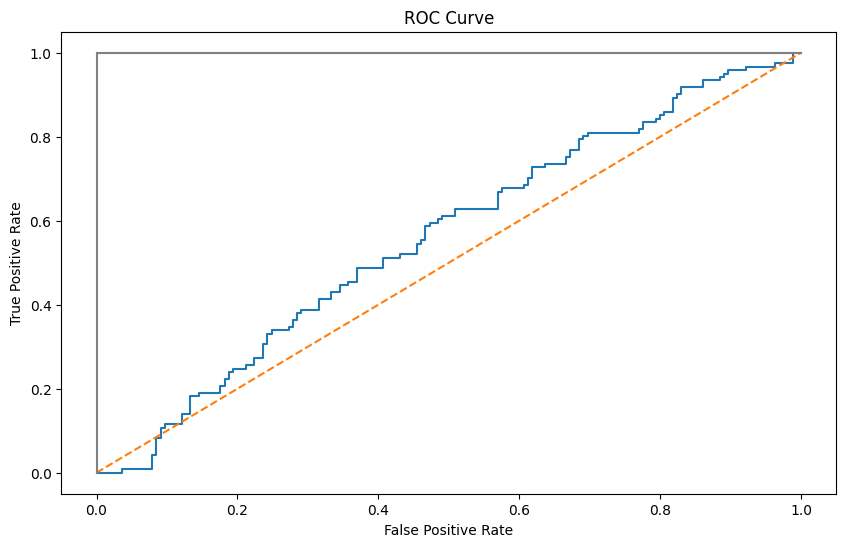

In [1641]:
plot_roc_curve(rf_model, X_test, Y_test)

Accuracy: 0.5664335664335665
Recall: 0.03305785123966942
Precision: 0.36363636363636365
F1 Score: 0.06060606060606061


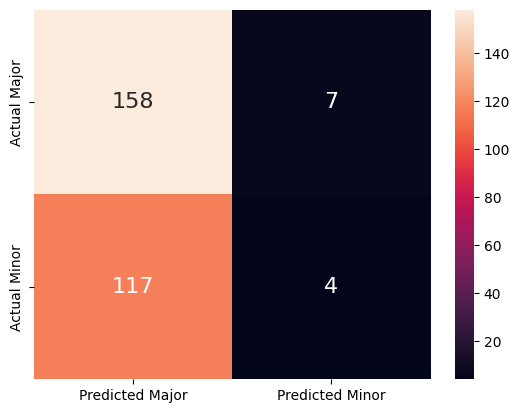

In [1642]:
X_train, X_test, Y_train, Y_test = split_data(df_pca, 'mode', df_spotify)
rf_model, predictions = random_forest(X_train, X_test, Y_train, Y_test)
plot_confusion_matrix(Y_test, predictions)

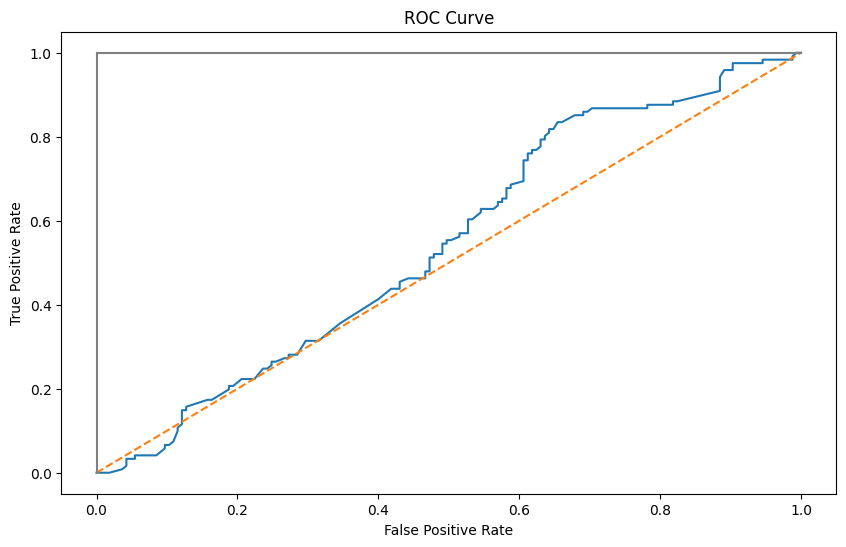

In [1643]:
plot_roc_curve(rf_model, X_test, Y_test)

Accuracy: 0.5734265734265734
Recall: 0.024793388429752067
Precision: 0.42857142857142855
F1 Score: 0.04687500000000001


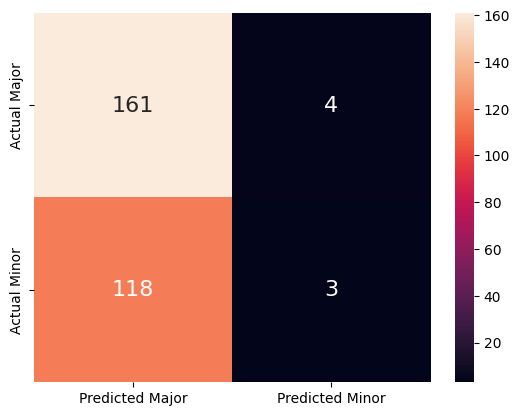

In [1644]:
X_train, X_test, Y_train, Y_test = split_data(df_percentages, 'mode', df_spotify)
rf_model, predictions = random_forest(X_train, X_test, Y_train, Y_test)
plot_confusion_matrix(Y_test, predictions)

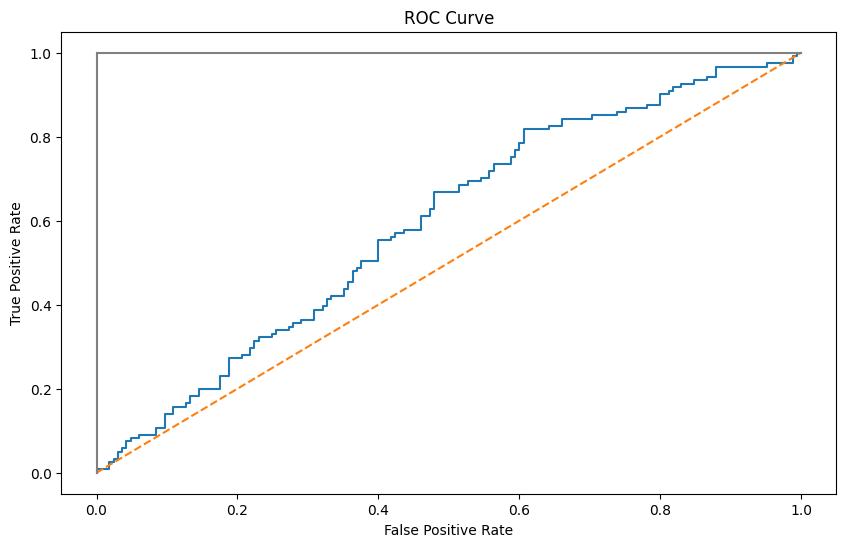

In [1645]:
plot_roc_curve(rf_model, X_test, Y_test)

In [1646]:
def naive_bayes(X_train, X_test, Y_train, Y_test):
    # Create a random forest classifier

    nb_model = GaussianNB()

    # Train the model

    nb_model.fit(X_train, Y_train)

    # Make predictions on the test data

    predictions = nb_model.predict(X_test)

    accuracy = accuracy_score(Y_test, predictions)
    print('Accuracy:', accuracy)

    recall = recall_score(Y_test, predictions, average='weighted')
    print('Recall:', recall)

    precision = precision_score(Y_test, predictions, average='weighted')
    print('Precision:', precision)

    f1 = f1_score(Y_test, predictions, average='weighted')
    print('F1 Score:', f1)

    return nb_model, predictions


Accuracy: 0.5034965034965035
Recall: 0.4297520661157025
Precision: 0.416
F1 Score: 0.4227642276422764


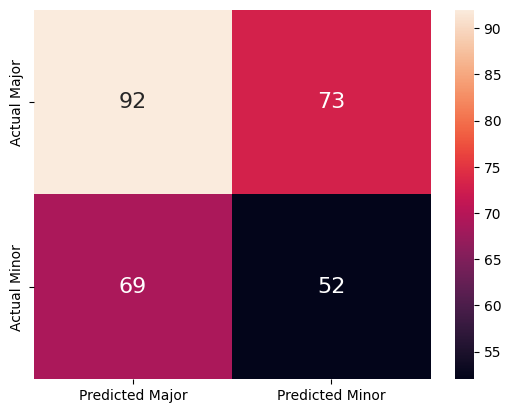

In [1647]:
X_train, X_test, Y_train, Y_test = split_data(feature_selection_low_variance, 'mode', df_spotify)
nb_model, predictions = naive_bayes(X_train, X_test, Y_train, Y_test)
plot_confusion_matrix(Y_test, predictions)

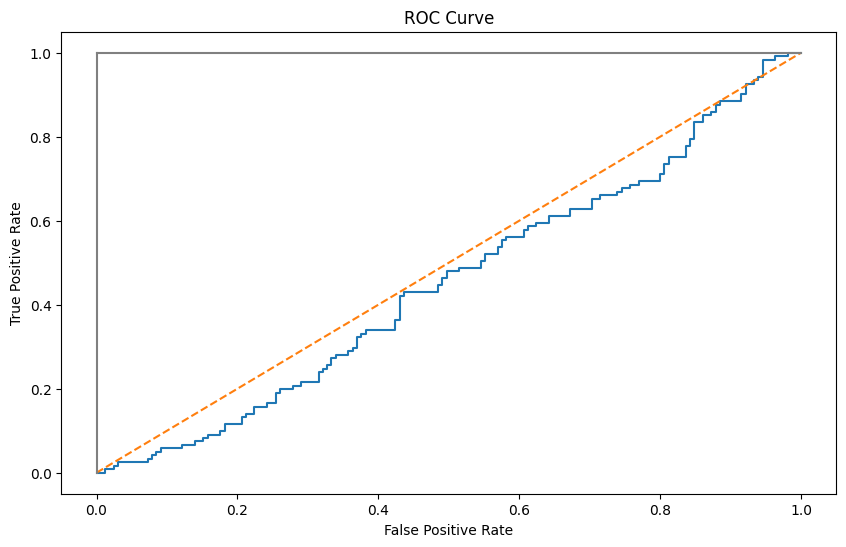

In [1648]:
plot_roc_curve(nb_model, X_test, Y_test)

Accuracy: 0.5244755244755245
Recall: 0.6198347107438017
Precision: 0.45454545454545453
F1 Score: 0.5244755244755245


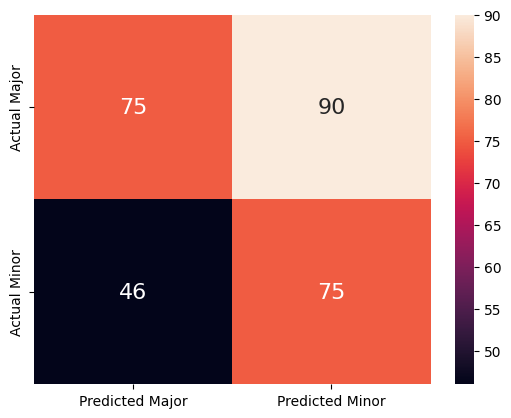

In [1649]:
X_train, X_test, Y_train, Y_test = split_data(feature_selection_high_correlation, 'mode', df_spotify)
nb_model, predictions = naive_bayes(X_train, X_test, Y_train, Y_test)
plot_confusion_matrix(Y_test, predictions)

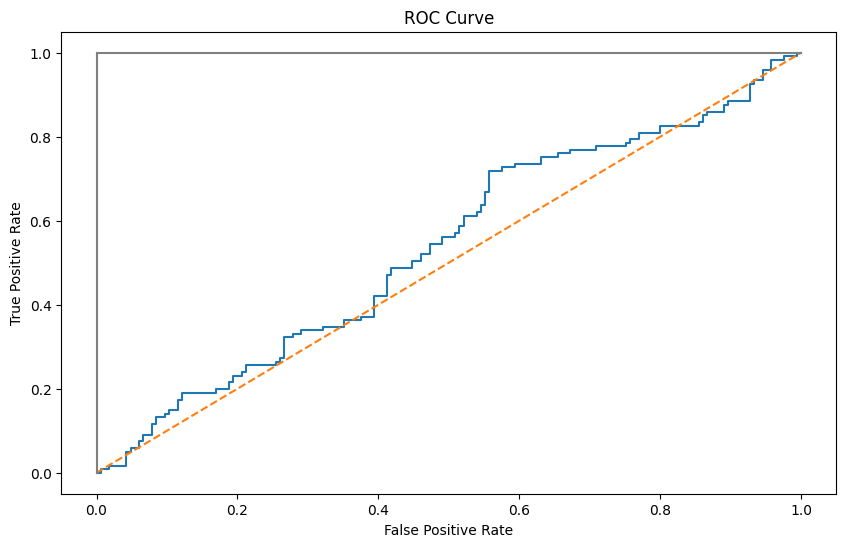

In [1650]:
plot_roc_curve(nb_model, X_test, Y_test)

Accuracy: 0.5174825174825175
Recall: 0.33884297520661155
Precision: 0.41414141414141414
F1 Score: 0.37272727272727274


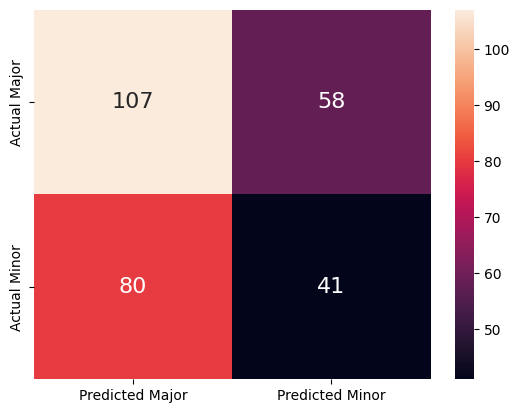

In [1651]:
X_train, X_test, Y_train, Y_test = split_data(df_pca, 'mode', df_spotify)
nb_model, predictions = naive_bayes(X_train, X_test, Y_train, Y_test)
plot_confusion_matrix(Y_test, predictions)

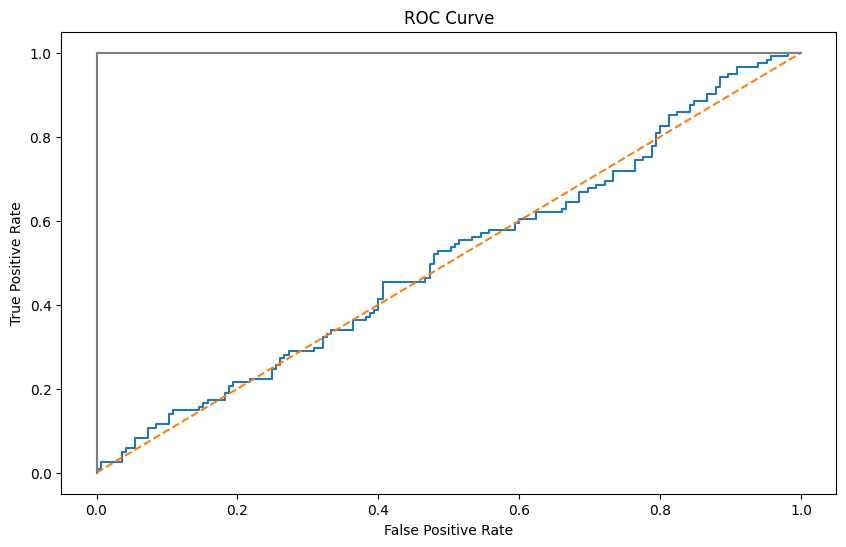

In [1652]:
plot_roc_curve(nb_model, X_test, Y_test)

Accuracy: 0.5664335664335665
Recall: 0.5454545454545454
Precision: 0.4888888888888889
F1 Score: 0.515625


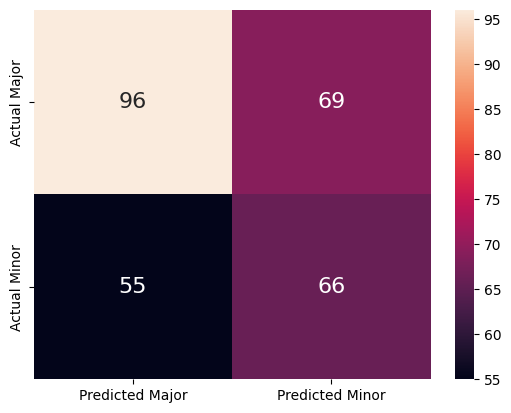

In [1653]:
X_train, X_test, Y_train, Y_test = split_data(df_percentages, 'mode', df_spotify)
nb_model, predictions = naive_bayes(X_train, X_test, Y_train, Y_test)
plot_confusion_matrix(Y_test, predictions)

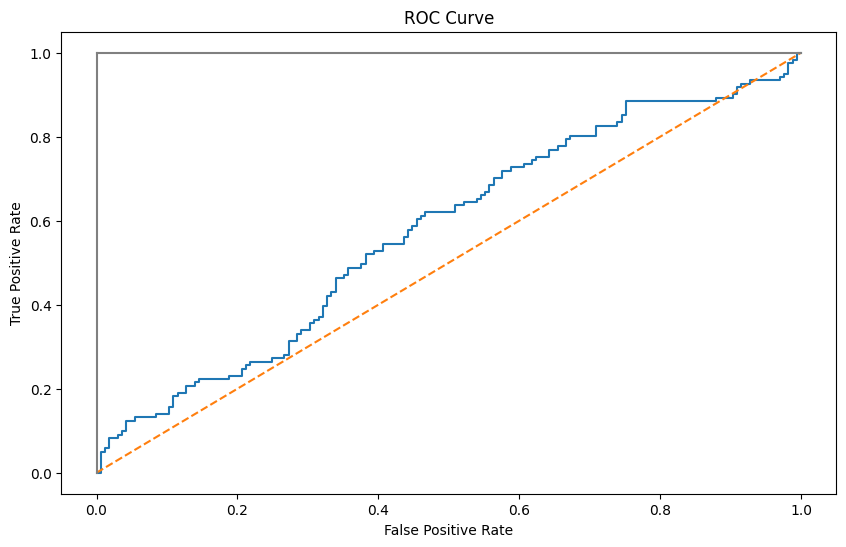

In [1654]:
plot_roc_curve(nb_model, X_test, Y_test)

In [1655]:
def compare_classifications(lr_accuracy, rf_accuracy, nb_accuracy, lr_precision, rf_precision, nb_precision, lr_recall, rf_recall, nb_recall, lr_f1, rf_f1, nb_f1):
    metrics_df = pd.DataFrame({ 'Model' : ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Logistic Regression', 'Random Forest', 'Naive Bayes'],
                                'Metric' : ['Accuracy', 'Accuracy', 'Accuracy', 'Precision', 'Precision', 'Precision', 'Recall', 'Recall', 'Recall', 'F1 Score', 'F1 Score', 'F1 Score'],
                                'Score' : [lr_accuracy, rf_accuracy, nb_accuracy, lr_precision, rf_precision, nb_precision, lr_recall, rf_recall, nb_recall, lr_f1, rf_f1, nb_f1]})

    sns.barplot(x='Model', y='Score', hue='Metric', data=metrics_df)
    plt.legend(loc='center right')
    plt.show()
